In [1]:
%matplotlib inline

import stumpy
import pandas as pd
import numpy as np
from zipfile import ZipFile
from io import BytesIO
import os
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [2]:
def change_plot_size(width, height, plt):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size

change_plot_size(20, 6, plt)

In [3]:
fzip = urlopen("http://alumni.cs.ucr.edu/~lexiangy/Shapelet/gun.zip")
gun_train = ZipFile(BytesIO(fzip.read())).extract('gun_train')
df = pd.read_csv(gun_train, sep="\\s+", header=None)
os.remove(gun_train)

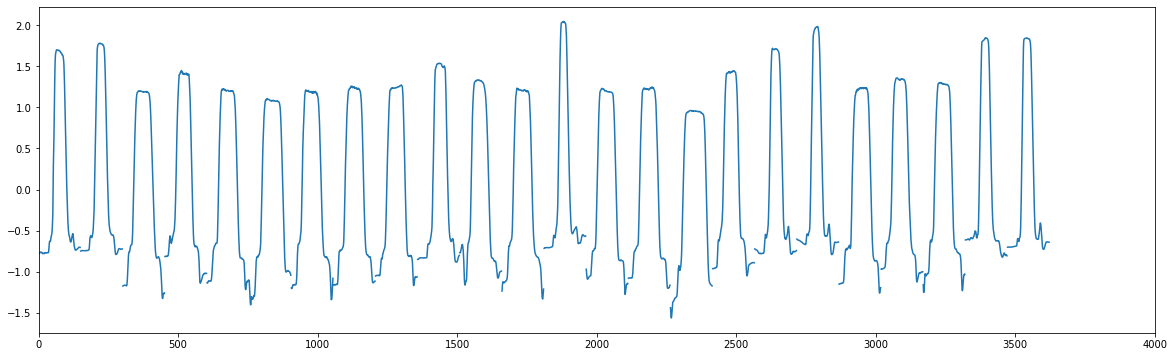

In [4]:
gun_df = df[df.iloc[:, 0] == 0.0]
gun_df = gun_df.assign(NaN=np.nan)
gun_df = gun_df.iloc[:, 1:]
gun_df = gun_df.stack(dropna=False).to_frame().reset_index(drop=True)
plt.xlim(0, 4000)
plt.plot(gun_df)

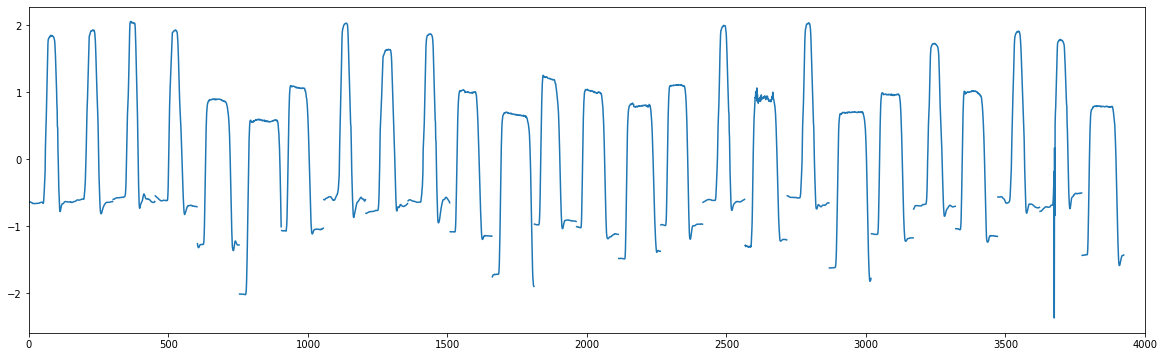

In [5]:
no_gun_df = df[df.iloc[:, 0] == 1.0]
no_gun_df = no_gun_df.assign(NaN=np.nan)
no_gun_df = no_gun_df.iloc[:, 1:]
no_gun_df = no_gun_df.stack(dropna=False).to_frame().reset_index(drop=True)
plt.xlim(0, 4000)
plt.plot(no_gun_df)

In [6]:
m = 38
P_BA = stumpy.stump(gun_df.iloc[:, 0], m, no_gun_df.iloc[:, 0], ignore_trivial=False)[:, 0].astype(np.float64)
P_BB = stumpy.stump(no_gun_df.iloc[:, 0], m)[:, 0].astype(np.float64)

P_BA[P_BA == np.inf] = np.nan
P_BB[P_BB == np.inf] = np.nan

In [7]:
P = P_BA - P_BB
idx = np.argpartition(np.nan_to_num(P), -10)[-10:]

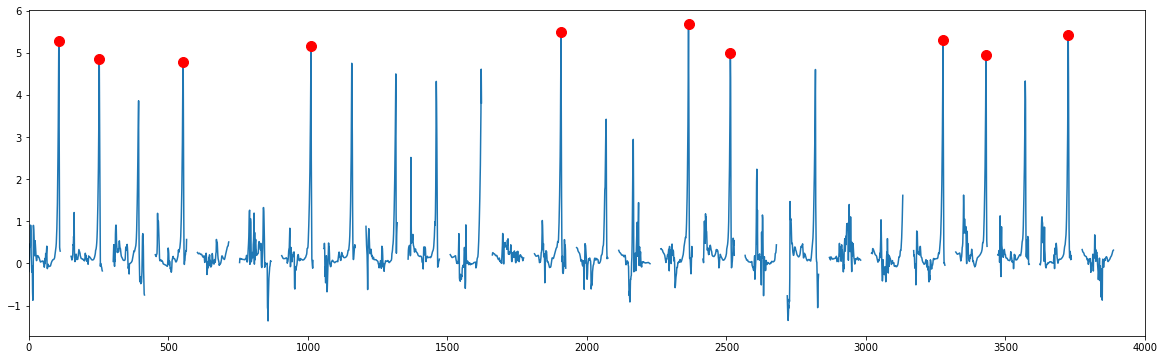

In [8]:
plt.xlim(0, 4000)
plt.plot(P)
plt.plot(idx, P[idx], color="red", marker='o', linewidth=0, markersize=10)